# **Music Recommendation System**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/



### **Importing Libraries and the Dataset**

In [1]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

from sklearn.preprocessing import LabelEncoder #To do label encoding

In [2]:
#importing the datasets
count_df = pd.read_csv('C:/MITADSC/Capstone/count_data.csv')
song_df = pd.read_csv('C:/MITADSC/Capstone/song_data.csv')

#copy the data to another dataframe to preserve the orginal
count_df_copy = count_df 
song_df_copy = song_df 

In [3]:
#importing the datasets
count_df = pd.read_csv('C:/MITADSC/Capstone/count_data.csv')
song_df = pd.read_csv('C:/MITADSC/Capstone/song_data.csv')

count_df_copy = count_df 
song_df_copy = song_df

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df_copy.head(n=10) 

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data
song_df_copy.head(n=10) 

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# See the info of the song_df data
song_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:Unnamed:  0 appears to be the same as the index so it can be removed. Title and release have a handful of missing values but we probably have enough identifiers with song_id, artist_name, and year to make connections. We may have to drop these later if the results are not usable. There are 2 million entries in count_df_copy and 1 million in song_df_copy. We'll look at ways to trim these down to the more meaningful entries. Song_id is in both sets and we can use this as a linking factor to merge the dataframes. **


In [8]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
combined_df = pd.merge(left = count_df_copy, right = song_df_copy, how='left', left_on='song_id', right_on='song_id').drop_duplicates(subset=["user_id", "song_id"] , keep="first")

# Drop the column 'Unnamed: 0'
combined_df.drop('Unnamed: 0', 1, inplace=True) 

#checked the results to see if they made sense
combined_df.head(n=10)

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
10,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features? We can use LabelEncoder to convert the hashes into a numeric form that is easier to parse. 

In [9]:
# Apply label encoding for "user_id" and "song_id"
le = LabelEncoder() 
combined_df['user_id'] = le.fit_transform(combined_df['user_id'])
combined_df['song_id'] = le.fit_transform(combined_df['song_id'])

#checking the results to see they make sense
combined_df.head() 


,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
4,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
5,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa? It is not required but it is very useful to set a threshold for minimum number of interactions since too small of a sample size can give us skewed results. For example, there may be 2-3 people who love an obscure song that very few other people are interested in. 

In [10]:
# Get the column containing the users
users = combined_df.user_id
# Create a dictionary from users to their number of songs
play_count = dict()
for user in users:
    # If we already have the user, just add 1 to their play count
    if user in play_count:
        play_count[user] += 1
    # Otherwise, set their play count to 1
    else:
        play_count[user] = 1      

In [11]:
# We want our users to have listened at least 90 songs
PLAYS_CUTOFF = 90
remove_users = []
for user, play_count in play_count.items():
    if play_count < PLAYS_CUTOFF:
        remove_users.append(user)
combined_df = combined_df.loc[~combined_df.user_id.isin(remove_users)]

In [12]:
combined_df.info() #checking results of the threshold cutoff

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438390 entries, 205 to 2086703
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      438390 non-null  int32 
 1   song_id      438390 non-null  int32 
 2   play_count   438390 non-null  int64 
 3   title        438390 non-null  object
 4   release      438390 non-null  object
 5   artist_name  438390 non-null  object
 6   year         438390 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 23.4+ MB


In [13]:
# Get the column containing the songs
songs = combined_df.song_id
# Create a dictionary from songs to their number of users
play_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in play_count:
        play_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        play_count[song] = 1   

In [14]:
# We want our song to be listened by atleast 120 users to be considered
PLAYS_CUTOFF = 120
remove_songs = []
for song, play_count in play_count.items():
    if play_count < PLAYS_CUTOFF:
        remove_songs.append(song)
df_final= combined_df.loc[~combined_df.song_id.isin(remove_songs)]

In [15]:
df_final.shape

(130398, 7)

In [16]:
# Drop records with play_count more than(>) 5
df_final.drop(df_final.index[df_final['play_count'] > 5 ], inplace=True)

In [17]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [19]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [20]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights: There are fewer songs than users so we will need to see if a there are songs that have many listeners or if certain users have extremely high play counts of the same song but few others. There are also fewer artists than songs so likely most artists have multiple songs. **


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

Most interacted users

In [22]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:There is a steep dropoff from the top song to the second song and then again to the third song. It appears to level out after that. Likewise with the user counts, there is a large falloff from the top user to the second place user. These might be skewing the data. **


Songs played in a year

In [23]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


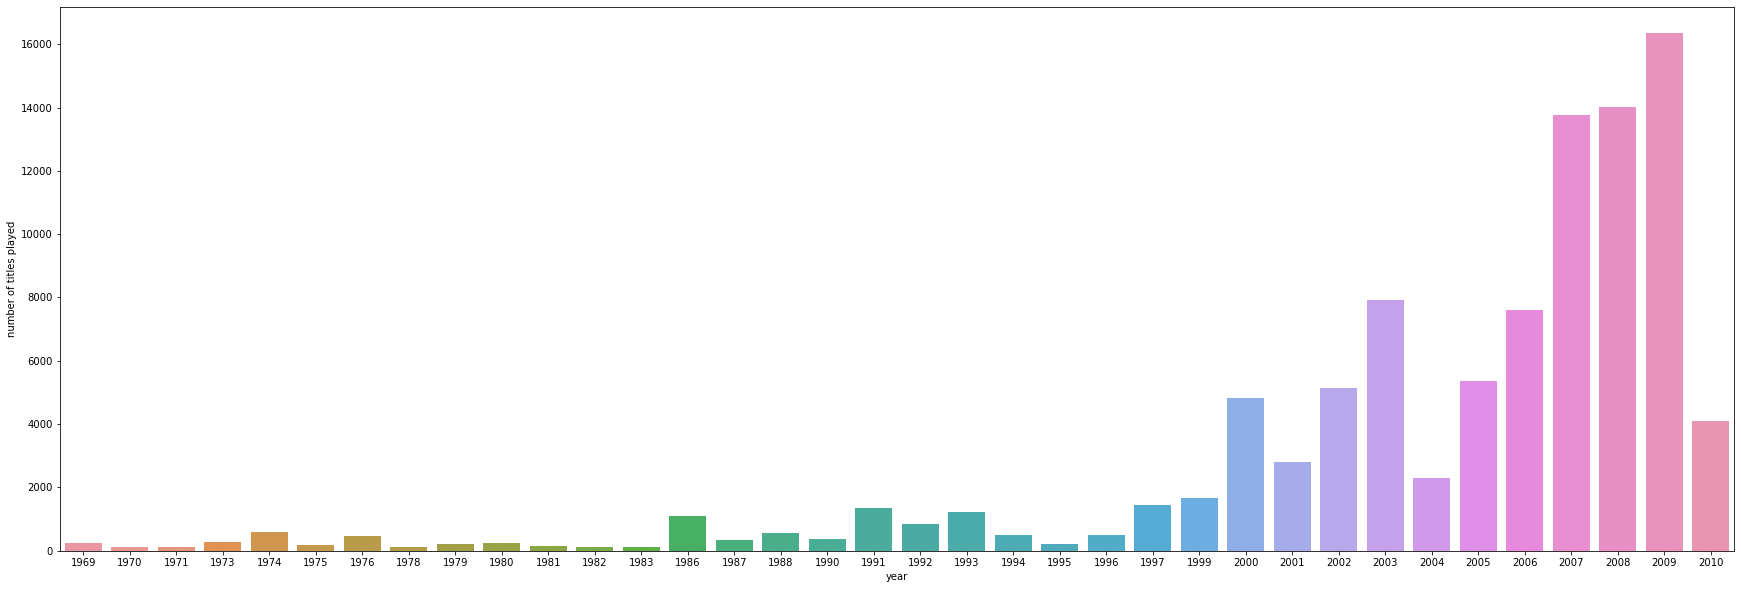

In [24]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

#### **Observations and Insights:There is a significant left shift when looking at the data by year, likely due to online streaming taking off around 2000. This could be skewing the results and keeping people who prefer older music from getting the correct recommendations. ** # 

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques – We will first try a user to user based recommendation system to recommend songs that similar users listen to, then a song to song based system based on similar songs to what the user is currently listening to, then a user to song based system based on the past behavior of the user.  
Overall solution design – We will test each of these models then fine tune them and compare the fine tuned results to find the best model. 
Measures of success- We will measure the results based on precision@K and recall@K which will show our percentages of false negatives and false positives then an overall f_1 score which combines the two.
<br>**

In [25]:
df_final.to_csv('C:/MITADSC/Capstone/df_final.csv')

In [26]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [27]:
#Now that we have explored the data, let's apply different algorithms to build recommendation systems

In [28]:
### **Popularity-Based Recommendation Systems**

In [29]:
#Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

In [30]:
#Calculating average play_count. Use groupby function on the song_id column. 
average_count = df_final.groupby('song_id').mean()['play_count'] 

#Calculating the frequency a song is played. Use groupby function on the song_id column
play_freq = df_final.groupby('song_id').sum()['play_count']



In [31]:
#Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,430
22,1.492424,197
52,1.729216,728
62,1.728070,197
93,1.452174,167


In [32]:
#Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
#Build the function for finding top n songs

def top_n_songs(average_count, n, play_freq):
    
    #Finding products with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > play_freq]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

In [34]:
#Recommend top 10 songs using the function defined above with at least 100 plays
top_songs = list(top_n_songs(final_play, 10, 100))
top_songs


[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [35]:
### **User User Similarity-Based Collaborative Filtering**

In [36]:
#To build the user-user-similarity based and subsequent models we will use the "surprise" library.

In [37]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

In [38]:
### Some useful functions

In [39]:
#The below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

In [40]:
#The function to calculate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [41]:
#**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by chaning the threshold? What is the intuition behind using the threshold value 1.5? 

In [42]:
# Instantiating Reader scale with expected play count
reader = Reader(rating_scale=(0, 5)) #use (0,5)

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) #Take only "user_id","song_id", and "play_count"

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42) # Take test_size=0.4

In [43]:
#Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1) #use random_state=1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user, k=30) #Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


In [44]:
#Observations:  
#We are getting a recall of 0.692, which means out of all the relevant restaurants 69.2% are recommended.
#We are getting a precision of 0.396, which means out of all the recommended restaurants 39.6% are relevant.
#Here F_1 score of the baseline model is almost 0.504. It indicates that mostly recommended restaurants were relevant and relevant restaurants were recommended. 
#We will try to improve this by using GridSearchCV by tuning different hyperparameters of this algorithm.

In [45]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True) #use user id 6958 and song_id 1671 

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [46]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958, 3232, verbose=True) #Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

In [47]:
#Observations: The output gives us a prediction of 1.8 play counts compared to the actual number of 2 play counts for song_id 1671. This is slightly under estimating the count.

In [48]:
#Let's try to improve model performance
#Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data) #Use entire data for GridSearch

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0465328320290022
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [49]:
# Train the best model found in above gridsearch.
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_user_user_optimized)


RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


In [50]:
#Observations: Precision, Recall, and F_1 score all went up slightly but we ideally want Precision to be closer to .500

In [51]:
#Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui=2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [52]:
#Predict the play count for a song that is not listened by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

In [53]:
#Observations: The estimate was much closer to the actual number of plays at 1.96 compared to 2.

In [54]:
#Use inner id 0. 
sim_user_user_optimized.get_neighbors(0,5)

[42, 1131, 17, 186, 249]

In [55]:
#Below we will be implementing a function where the input parameters are - 

#- data: a **song** dataset
#- user_id: a user id **against which we want the recommendations**
#- top_n: the **number of songs we want to recommend**
#- algo: the algorithm we want to use **for predicting the play_count**
#- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [56]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended product ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
    
    # extracting those song ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # predicting the ratings for those non interacted song ids by this user
        est = algo.predict(user_id, item_id).est
        
        # appending the predicted ratings
        recommendations.append((item_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating products for this user

In [57]:
#Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [58]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_plays"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


In [59]:
#Observations: our predicted play counts for each is over 2 which means the user will like the song enough for a replay.

In [60]:
### Correcting the play_counts and Ranking the above songs

In [61]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)
  
  return ranked_songs

In [62]:
#Applying the ranking_songs function on the final_play data. 
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,5531,1427,2.553335,2.526863
1,317,836,2.518269,2.483683
2,5943,830,2.390723,2.356012
3,4954,338,2.406776,2.352383
4,8635,259,2.396606,2.334469


In [63]:
#Observations: The corrected play counts did not change the predicted play counts noticeably. 

In [64]:
#Think About It: In the above function to make the correction in the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [65]:
### Item Item Similarity-based collaborative filtering recommendation systems 

In [66]:
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.

sim_options = {'name': 'cosine',
               'user_based': False}

#KNN algorithm is used to find desired similar items.
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =10.
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


In [67]:
#predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user.
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [110]:
####Predict the play count for a user that has not listened to the song (with song_id 1671)

sim_item_item.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

In [69]:
#Observations: Our estimate for the known song was much worse than the user to user models at 1.36 compared to the 2 actual.

In [70]:
#Apply grid search for enhancing model performance

# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# find best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0252006322118195
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [71]:
#Apply the best model found in the grid search.
sim_options =  {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 2}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6 , random_state=1, verbose=False)

# training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score@k and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


In [72]:
#Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [73]:
#predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user.
sim_item_item_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

In [74]:
#Observations: We got the same estimate for both optimized models. The item to item is likely going to be preferred since it uses similar songs rather than attempting to find similar user profiles. Personal musical tastes are much more varied than similar songs.

In [75]:
#Find five most similar users to the user with inner id 0
sim_item_item_optimized.get_neighbors(0, k=5)

[124, 523, 173, 205, 65]

In [76]:
#Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [77]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [78]:
#Applying the ranking_songs function. 
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,2342,146,2.653903,2.571143
3,5101,192,2.386577,2.314408
2,139,207,2.313727,2.244222
1,7519,235,2.270864,2.205631
0,8099,465,2.212702,2.166328


In [79]:
#Observations: The top recommended song had higher predicted and corrected play counts in this model but the number fell off slightly for the rest of the top 5.

In [80]:
### Model Based Collaborative Filtering - Matrix Factorization

In [81]:
#Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [82]:
# Build baseline model using svd
svd = SVD(random_state=1)

# training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [83]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui=2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [111]:
# Making prediction for user who has not listened the song (song_id 3232). Use previous code to find user.
svd.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.556167508440366, details={'was_impossible': False})

In [85]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs_.fit(data)

# best RMSE score
print(gs_.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.012883047754929
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [86]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state=1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


In [87]:
#Observations: Precision, recall, and F_1 score are all very close to the previous models.

In [88]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [89]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

In [90]:
#Observations: This optimized model performed worse than the previous optimized models at 1.34 estimated plays compared to the actual 2 plays.

In [91]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [92]:
#Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,361,2.601899,2.549267
4,5653,248,2.108728,2.045227
3,8324,252,2.014091,1.951097
2,6450,263,1.952493,1.890830
0,9942,373,1.940115,1.888337


In [93]:
#Observations: This model gives us a similar top recommended song but the rest of the top 5 ends up giving us less than 2.

In [94]:
### Cluster Based Recommendation System

In [95]:
#In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [96]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state=1)

# training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_baseline, k = 10)

RMSE: 1.0487
Precision:  0.405
Recall:  0.496
F_1 score:  0.446


In [97]:
#Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [98]:
#Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user.
clust_baseline.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

In [99]:
# set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

# performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.061041005281136
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 20}


In [100]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=5,n_cltr_i=5, n_epochs=10, random_state=1)

# training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


In [101]:
#Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [102]:
#Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
clust_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

In [103]:
#Observations: The Precision, Recall, and F_1 score are all lower with this model. The estimated number of plays in the tuned model is also slightly lower at 1.91 compared to 1.96 in previous models

In [104]:
#Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

In [105]:
#Correcting play count and ranking above songs

ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,361,2.601899,2.549267
4,5653,248,2.108728,2.045227
3,8324,252,2.014091,1.951097
2,6450,263,1.952493,1.890830
0,9942,373,1.940115,1.888337


In [106]:
#Observations: This model also gives us predicted counts of less than 2 in the top 5. The complexity of the model for the expanded data set in production will likely mean we are better off with user to user or item to item.

In [107]:
### Content Based Recommendation Systems

In [108]:
**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

Object `account` not found.


In [ ]:
#**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account

In [112]:
#**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account

In [113]:
#Make a copy of the df_final datafram
df_small=df_final

In [114]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"
df_small['text']=df_small['title'].astype(str)+' '+df_small['release']+' '+df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
209,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
211,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
212,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
213,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
214,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [115]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
col_names = ['user_id', 'song_id', 'play_count', 'title', 'text']
df_small = df_small[col_names]

#drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'], keep = 'first')


In [116]:
#Set the title column as the index
df_small = df_small.set_index('title')


In [117]:
# see the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [118]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [119]:
#Importing necessary packages to work with text data
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to C:\Users\Hank
[nltk_data]     Daily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hank
[nltk_data]     Daily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hank
[nltk_data]     Daily\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:
#We will create a **function to pre-process the text data:**

In [121]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words("english")] #Use stopwords of english
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [122]:
#Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array.
df_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [123]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(df_tfidf, df_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [124]:
# Finally, let's create a function to find most similar songs to recommend for a given song

In [125]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

In [126]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations("Learn To Fly", similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [ ]:
#Observations: These look like pretty solid recommendations but without adding genre to the model, we could end up recommending rap to someone listening to country, for example, just based on similar words in the title and artist.

In [ ]:
## **Conclusion and Recommendations:** 

#- **Refined Insights -** Overall Spotify will be able to benefit from using a robust recommendation system to keep users engaged. We should focus additional refinements on Precision as it is more important for the recommendations to be relevant. Users who are constantly receiving recommentationd that are not relevant can lose confidence in them and stop using the recommendations

#- **Comparison of various techniques and their relative performance -** The item to item system will work out best overall. User preferences can vary widely overall and the clustering model did not provide enough benefit to justify computing costs once we expand the data set to the production environment. The text classification is interesting but simply using song and artist titles without context could provide non-relevant recommendations such as completely different genres.

#- **Proposal for the final solution design -** The final solution design should be a hybrid model that begins with the top most played songs for new users and then transitions to an item to item based model once the system has enough data on the user to make relevant recommendations.